# **Lab|Customer Analysis Round 1**

1. Task 1 Read the three files into python as dataframes



In [75]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [88]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [89]:
#Assigning and reading the first file (file1.csv)
url1 = 'https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-1/master/files_for_lab/csv_files/file1.csv'
data_file1 = pd.read_csv(url1)
data_file1.head()


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [90]:
#Assigning and reading the second file (file2.csv)
url2 = 'https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-1/master/files_for_lab/csv_files/file2.csv'
data_file2 = pd.read_csv(url2)
data_file2.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.6,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.2,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.6,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.2,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.2,Corporate Auto,Two-Door Car


In [91]:
data_file1.describe()

,Income,Monthly Premium Auto,Total Claim Amount
count,1071.000000,1071.000000,1071.000000
mean,39295.701214,193.234360,404.986909
std,30469.427060,1601.190369,293.027260
min,0.000000,61.000000,0.382107
25%,14072.000000,68.000000,202.157702
50%,36234.000000,83.000000,354.729129
75%,64631.000000,109.500000,532.800000
max,99960.000000,35354.000000,2893.239678


**Finding**: It is missing Customer Lifetime value- suggests something is wrong in this column.

In [92]:
#Assigning and reading the third file (file3.csv)
url3 = 'https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-1/master/files_for_lab/csv_files/file3.csv'
data_file3 = pd.read_csv(url3)
data_file3.head()

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV


2. Show the DataFrame's shape.

In [93]:
#data_file1 shape
data_file1.shape

(4008, 11)

In [94]:
#data_file2 shape
data_file2.shape

(996, 11)

In [95]:
#data_file3 shape
data_file3.shape

(7070, 11)

**Finding:** noticed, the number of columns are the same so we are good to proceed in terms of the number of columns, but the columns are not in order so we may need to rearrange them later.

3. Standardize header names.

Let's look at column headers first and see what is the easiest way to standardize them across three file dataframes.

In [96]:
#assigning variables to column names for each dataframes.
column_names1 = data_file1.columns
column_names2 = data_file2.columns
column_names3 = data_file3.columns

In [97]:
#standardizing data_file1
cols_1 = []
#[column_names1.lower() for column_names1 in data_file1.columns]

for column_names1 in data_file1.columns:
  cols_1.append(column_names1.lower())

data_file1.columns= cols_1


In [98]:
#standardizing data_file2
cols_2 = []
#[column_names2.lower() for column_names2 in data_file2.columns]

for column_names2 in data_file2.columns:
  cols_2.append(column_names2.lower())

data_file2.columns= cols_2

In [99]:
#standardizing data_file3
cols_3 = []
#[column_names3.lower() for column_names3 in data_file3.columns]

for column_names3 in data_file3.columns:
  cols_3.append(column_names3.lower())

data_file3.columns= cols_3

**Finding**: Datafile1 and Datafile2 contains values in 'customer lifetime value' as strings because it contains % sign. Need to fix it.

In [100]:
#customer lifetime value - first two files have % in the end, but the third file doesnot have it. We need to correct those.
data_file1['customer lifetime value'].dtype

#defining a function to remove %
def remove_perc_sign(x):
  if type(x)==str:
    return x.replace("%"," ")
    #if x.endswith('%'):
      #return x[:-1]
    #else:
      #return float(x)
  else:
    return float(x)

dtype('O')

In [103]:
print("------")
print(" ")
#using the function created in last line to remove % signs, map function will iterate over each row, and function will remove % sign
#then using the list command to create a list of these values

data_file1['customer lifetime value'] = list(map(remove_perc_sign,data_file1['customer lifetime value']))
data_file1['customer lifetime value'].head()
print(" ")
print("------")
print(" ")

data_file2['customer lifetime value'] = list(map(remove_perc_sign,data_file2['customer lifetime value']))
data_file2['customer lifetime value'].head()
print(" ")
print("------")
print(" ")



------
 


0            NaN
1     697953.59 
2    1288743.17 
3     764586.18 
4     536307.65 
Name: customer lifetime value, dtype: object

 
------
 


0     323912.47 
1     462680.11 
2     899704.02 
3    2580706.30 
4     380812.21 
Name: customer lifetime value, dtype: object

 
------
 


In [104]:
#after removing the % we need to convert customer lifetime values to float, defining a function for that
def conv_float(x):
  if type(x) == str:
    return float(x)
  else:
    return x

In [105]:
#now, repeating the process as above for removing % sign to convert the strings into floats
print(" ")
print("------")
print(" ")
data_file1['customer lifetime value'] = list(map(conv_float,data_file1['customer lifetime value']))
data_file1['customer lifetime value'].head()
print(" ")
print("------")
print(" ")
data_file2['customer lifetime value'] = list(map(conv_float,data_file2['customer lifetime value']))
data_file2['customer lifetime value'].head()
print(" ")
print("------")
print(" ")


 
------
 


0           NaN
1     697953.59
2    1288743.17
3     764586.18
4     536307.65
Name: customer lifetime value, dtype: float64

 
------
 


0     323912.47
1     462680.11
2     899704.02
3    2580706.30
4     380812.21
Name: customer lifetime value, dtype: float64

 
------
 


4. Rearrange the columns in the dataframe as needed.

In [106]:
#list of column headers data_file1,2,3.
print(" ")
print("------")
print(" ")

data_file1.columns.tolist()

#list of column headers data_file2
print(" ")
print("------")
print(" ")

data_file2.columns.tolist()

#list of column headers data_file2
print(" ")
print("------")
print(" ")

data_file3.columns.tolist()

 
------
 


['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

 
------
 


['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount',
 'policy type',
 'vehicle class']

 
------
 


['customer',
 'state',
 'customer lifetime value',
 'education',
 'gender',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'total claim amount',
 'vehicle class']

In [107]:
#in data_file2 has column header 'Total Claim Amount' in the wrong column index. It will be easier to move it to the last position.
data_file2 = data_file2.reindex(columns=['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount'])
data_file2.columns.tolist()

print(" ")
print("------")
print(" ")


#in data_file3 reindexing the headers to the same column headers as in data_file1
data_file3 = data_file3.reindex(columns=['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount'])
data_file3.columns.tolist()


['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

 
------
 


['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

5. Concatenate the three dataframes

In [108]:
#concatenating and checking shape, head and sample to see how it looks after:
data = pd.concat([data_file1,data_file2,data_file3],axis =0)
data.shape
print(" ")
print("------")
print(" ")
data.head(5)
print(" ")
print("------")
print(" ")
data.sample(5)

(12074, 11)

 
------
 


,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


 
------
 


,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
6405,EO17010,NaN,M,Master,4751.280948,30887.0,119.0,0,Personal Auto,SUV,444.167713
3557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,CW98845,NaN,M,Bachelor,2316.796105,0.0,64.0,0,Personal Auto,Four-Door Car,307.200000
446,CE72177,NaN,F,High School or Below,5461.548993,39626.0,69.0,0,Personal Auto,Four-Door Car,485.705851
1394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Findings:**
1. Noticed customer column is actually storing car plates. I will keep it as it is for now, as it may not matter in this analysis to change it. 
2. gender has null values
3. CLV needs to be corrected.


6&7. Which columns are numerical? Which columns are categorical?

**by looking at the data**

1. customer                      - categorical
2. st                            - categorical
3. gender                        - categorical
4. education                     - categorical
5. customer lifetime value       - numerical
6. income                        - numerical
7. monthly premium auto          - numerical
8. number of open complaints     - numerical/categorical
9. policy type                   - categorical
10. vehicle class                - categorical
11. total claim amount           - numerical




In [123]:
#check if data types match the above deductions
data.dtypes
print(" ")
print("------")
print(" ")
#check if numeric data types match the above deductions
data.select_dtypes(include = np.object)
print(" ")
print("------")
print(" ")
#check if object data types match the above deductions
data.select_dtypes('object')
print(" ")
print("------")
print(" ")


customer                      object
st                            object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

 
------
 


,customer,st,gender,education,number of open complaints,policy type,vehicle class
0,RB50392,Washington,NaN,Master,1/0/00,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,1/0/00,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1/0/00,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,1/0/00,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,1/0/00,Personal Auto,Four-Door Car
...,...,...,...,...,...,...,...
7065,LA72316,NaN,M,Bachelor,0,Personal Auto,Four-Door Car
7066,PK87824,NaN,F,College,0,Corporate Auto,Four-Door Car
7067,TD14365,NaN,M,Bachelor,3,Corporate Auto,Four-Door Car
7068,UP19263,NaN,M,College,0,Personal Auto,Four-Door Car


 
------
 


,customer,st,gender,education,number of open complaints,policy type,vehicle class
0,RB50392,Washington,NaN,Master,1/0/00,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,1/0/00,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1/0/00,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,1/0/00,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,1/0/00,Personal Auto,Four-Door Car
...,...,...,...,...,...,...,...
7065,LA72316,NaN,M,Bachelor,0,Personal Auto,Four-Door Car
7066,PK87824,NaN,F,College,0,Corporate Auto,Four-Door Car
7067,TD14365,NaN,M,Bachelor,3,Corporate Auto,Four-Door Car
7068,UP19263,NaN,M,College,0,Personal Auto,Four-Door Car


 
------
 


8. Understand the meaning of all columns

**by looking at data above- deductions**
1. customer - this column identifies individual customer (through car plate numbers in this dataset). Datatype: String
2. st - this column idetifies where the customer has the policy registered. Data type: string                        
3. gender - this column identifies the gender of the customer. datatype: string 
4. education- this column probably stores the highest level of education of the customer. 
5. customer lifetime value - this column is the total amount of money customer is expected to spend in this company. 
6. income - this column stores the real/reported/predicted income level of the customer.                      
7. monthly premium auto - this is the amount of monthly premiums on their policy.          - 
8. number of open complaints - this column stores the number of open complaints stored from the customer. It is stored in #1/#2/# format so probably it is storing it in categorical way like departments or identifiers.
9. policy type - this column stores the type of policy chosen by the customer, so it can be the policy options offered by this company.
10. vehicle class - this column is storing the type of vehicle (probably the policy types are dependant on this)
11. total claim amount- this column is storing the total amount claimed by the customer. this needs to be checked and probably paid out/rejected dependant on the claim.


9. Perform the data cleaning operations mentioned so far in class

In [124]:
#drop the columns education and number of open complaints.
data = data.drop(['education'],axis=1)
data = data.drop(['number of open complaints'],axis = 1)
data.head(5)

#ran data = above commands, which removed 'education' and 'number of opens' and now it cannot find it, so it gives the KeyError

,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,697953.59,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,1288743.17,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,764586.18,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,536307.65,36357.0,68.0,Personal Auto,Four-Door Car,17.269323


In [127]:
#Correct the values in the column customer lifetime value. They are given as a percent, so multiply them by 100 and change dtype to numerical type.

mult_100 = lambda x: x*100

data['customer lifetime value'] = list(map(mult_100, data['customer lifetime value']))

#data['customer lifetime value'].head(10)
data.head(10)
print("Checking dtype for CLV      ")
print("------")
print("      ")
#already converted dtypes to float above for datafile1 and datafile2
#checking it again
data['customer lifetime value'].dtypes
print("Checking shape     ")
print("------")
print("      ")
#check for duplicate rows in the data and remove if any:

#make a duplicate copy of the dataframe
data_c = data.copy()
data_c.shape

#removing duplicate rows
print("Checking first ten rows of copy of dataframe     ")
print("------")
print("      ")
data_c = data_c.drop_duplicates(subset=['customer','gender'],keep='last')
data_c.head(10)



,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,6.979536e+11,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,1.288743e+12,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,7.645862e+11,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,5.363076e+11,36357.0,68.0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,8.256298e+11,62902.0,69.0,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,5.380899e+11,55350.0,67.0,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,7.216100e+11,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,2.412750e+12,14072.0,71.0,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,7.388178e+11,28812.0,93.0,Special Auto,Four-Door Car,425.527834


Checking dtype for CLV      
------
      


dtype('float64')

Checking shape     
------
      


(12074, 9)

Checking first ten rows of copy of dataframe     
------
      


,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,6.979536e+11,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,1.288743e+12,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,7.645862e+11,0.0,106.0,Corporate Auto,SUV,529.881344
5,OC83172,Oregon,F,8.256298e+11,62902.0,69.0,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,5.380899e+11,55350.0,67.0,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,7.216100e+11,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,2.412750e+12,14072.0,71.0,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,7.388178e+11,28812.0,93.0,Special Auto,Four-Door Car,425.527834
10,SX51350,California,M,4.738992e+11,0.0,67.0,Personal Auto,Four-Door Car,482.400000


In [128]:
#check for duplicate rows in the data and remove if any:

#make a duplicate copy of the dataframe
data_c = data.copy()
data_c.shape
print("      ")
print("------")
print("      ")

#removing duplicate rows

data_c = data_c.drop_duplicates(subset=['customer','gender'],keep='last')
data_c.head(10)
print("      ")
print("------")
print("      ")

(12074, 9)

      
------
      


,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,6.979536e+11,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,1.288743e+12,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,7.645862e+11,0.0,106.0,Corporate Auto,SUV,529.881344
5,OC83172,Oregon,F,8.256298e+11,62902.0,69.0,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,5.380899e+11,55350.0,67.0,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,7.216100e+11,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,2.412750e+12,14072.0,71.0,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,7.388178e+11,28812.0,93.0,Special Auto,Four-Door Car,425.527834
10,SX51350,California,M,4.738992e+11,0.0,67.0,Personal Auto,Four-Door Car,482.400000


      
------
      


In [129]:
#filtering the data for customers who have an income of 0 or less
data_c['income_zero']=data_c['income']=0
data_c['income_0_less']=data_c['income']<0
data_c.sample(6)
print("      ")
print("------")
print("      ")
#data_c['income_0_less'] = [(data_c['income']<0)|(data_c['income_zero'])]
data_c.head()

,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount,income_zero,income_0_less
2887,PS78418,NaN,M,5.773900e+09,0,73.0,Personal Auto,Two-Door Car,234.997994,0,False
4350,UI73553,NaN,F,2.359424e+09,0,63.0,Personal Auto,Four-Door Car,352.394515,0,False
6339,IO57824,NaN,M,2.953798e+09,0,87.0,Personal Auto,Four-Door Car,414.190987,0,False
3814,QS36363,NaN,F,1.265553e+10,0,157.0,Personal Auto,SUV,753.600000,0,False
281,SC93784,Oregon,M,5.510107e+11,0,69.0,Personal Auto,Four-Door Car,144.439335,0,False
1524,HX55735,NaN,F,4.462997e+09,0,73.0,Personal Auto,Two-Door Car,350.400000,0,False


      
------
      


,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount,income_zero,income_0_less
0,RB50392,Washington,NaN,NaN,0,1000.0,Personal Auto,Four-Door Car,2.704934,0,False
1,QZ44356,Arizona,F,6.979536e+11,0,94.0,Personal Auto,Four-Door Car,1131.464935,0,False
2,AI49188,Nevada,F,1.288743e+12,0,108.0,Personal Auto,Two-Door Car,566.472247,0,False
3,WW63253,California,M,7.645862e+11,0,106.0,Corporate Auto,SUV,529.881344,0,False
5,OC83172,Oregon,F,8.256298e+11,0,69.0,Personal Auto,Two-Door Car,159.383042,0,False


In [130]:
data_c['income_0_less'] = data_c[(data_c['income_zero']|data_c['income_0_less']==True)]
data_c.head()

,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount,income_zero,income_0_less
0,RB50392,Washington,NaN,NaN,0,1000.0,Personal Auto,Four-Door Car,2.704934,0,NaN
1,QZ44356,Arizona,F,6.979536e+11,0,94.0,Personal Auto,Four-Door Car,1131.464935,0,NaN
2,AI49188,Nevada,F,1.288743e+12,0,108.0,Personal Auto,Two-Door Car,566.472247,0,NaN
3,WW63253,California,M,7.645862e+11,0,106.0,Corporate Auto,SUV,529.881344,0,NaN
5,OC83172,Oregon,F,8.256298e+11,0,69.0,Personal Auto,Two-Door Car,159.383042,0,NaN




# **Lab | Customer Analysis Round 2**

In [131]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#creating dataframa from source file
url='https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-2/master/files_for_lab/csv_files/marketing_customer_analysis.csv'
data = pd.read_csv(url)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [133]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [134]:
#standardizing the header names
column_names = data.columns
column_names

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [135]:
#changing column headers to lowercase
cols =[]
for column_name in data.columns:
  cols.append(column_name.lower())
column_names = cols

#cols

In [136]:
data.shape

(9134, 24)

In [137]:
# numeric data

data._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [138]:
data.select_dtypes('object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [139]:
#find null values
data.isna().sum()
#data.dtypes

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [140]:
#Datetime format- Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie Jan Feb and March
import time
from datetime import time

data['Effective To Date'] = pd.to_datetime(data['Effective To Date'],errors='coerce')
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [145]:
#filter the data for the first quarter:
data['months']=pd.DatetimeIndex(data['Effective To Date']).month
#data.loc[data['months']<4]
#data.loc[data['Effective To Date']<'2011-04-01']
#data['Effective To Date'][0].month
#month_li = lambda x:data['Effective To Date'][x].month
#data['month1'] = list(map(lambda x:data['Effective To Date'][x].month,data['Effective To Date']))
#data.head()



In [146]:
#filter the data for first 4 months:
data['months']<4

data.sample(6)

0       True
1       True
2       True
3       True
4       True
        ... 
9129    True
9130    True
9131    True
9132    True
9133    True
Name: months, Length: 9134, dtype: bool

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,months
5891,QH51455,Arizona,4004.551300,No,Premium,College,2011-01-20,Unemployed,M,0,Suburban,Married,107,21,65,0,1,Personal Auto,Personal L3,Offer2,Agent,513.600000,Four-Door Car,Medsize,1
6726,CY80935,Oregon,14748.923730,No,Extended,High School or Below,2011-02-11,Employed,M,31226,Suburban,Married,93,31,68,0,2,Personal Auto,Personal L2,Offer1,Agent,446.400000,Four-Door Car,Medsize,2
6777,ZU71467,Arizona,5460.315095,No,Basic,Bachelor,2011-01-10,Employed,M,45404,Urban,Married,70,13,11,2,6,Corporate Auto,Corporate L3,Offer4,Web,266.144648,Two-Door Car,Medsize,1
8829,ZA60820,California,2409.003095,No,Basic,High School or Below,2011-01-14,Unemployed,M,0,Suburban,Single,67,7,72,0,1,Personal Auto,Personal L2,Offer2,Call Center,482.400000,Two-Door Car,Medsize,1
8275,JN33628,California,12316.796980,No,Premium,Bachelor,2011-02-22,Unemployed,M,0,Suburban,Married,167,30,40,0,5,Personal Auto,Personal L3,Offer2,Branch,1985.999807,SUV,Small,2
3439,EX89625,Arizona,5593.434009,No,Basic,Bachelor,2011-01-10,Employed,F,96406,Suburban,Married,69,16,64,0,8,Personal Auto,Personal L1,Offer2,Web,331.200000,Two-Door Car,Medsize,1


In [13]:
#BONUS: Put all the previously mentioned data transformations into a function.

#def date_trans(date):
  #data['Effective To Date'] = pd.to_datetime(data['Effective To Date'],errors='coerce')

# **Lab | Customer Analysis Round 3**

**EDA (Exploratory Data Analysis)**

In [14]:
#show info of the dataframe

data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
data.describe(include =[np.object])

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,PP64004,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


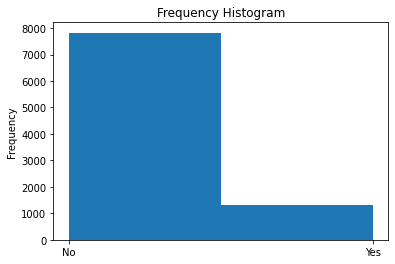

In [16]:
#next four tasks are plotting so need to import libraries
import matplotlib.pyplot as plt
import seaborn as sns

x = data['Response']
plt.hist(x, bins=2)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

Text(0.5, 1.0, 'Sales Channel v response rate')

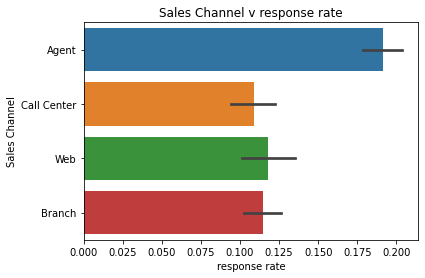

In [17]:
#Show a plot of the response rate by the sales channel.


#from collections import counter
def resp_rate(x):
  if x== "No":
    return 0
  else:
    return 1

data['response rate'] = list(map(resp_rate,data['Response']))
#objects = data['response rate']
#y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]
ax = sns.barplot(x="response rate",y="Sales Channel", data=data)
#plt.barh(y_pos, performance, align='center')
#plt.xlabel('Usage')
plt.title('Sales Channel v response rate')

plt.show()

#plt.scatter(x="response rate",y="Sales Channel")

#plt.show()

#plt.hist(x, bins=)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

#plt.hist(x, bins=2)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
#Show a plot of the response rate by income.
#plt.scatter(x=data['reponse rate'],y=data['Sales Channel'])
#plt.show()

Text(0.5, 1.0, 'Total Claim Amount v response rate by Sales Channel')

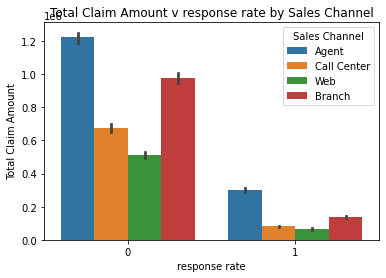

In [18]:
#Show a plot of the response rate by the total claim amount.
#ax = sns.barplot(x="response rate", y="Total Claim Amount", data=data,estimator = np.sum)
#plt.title('Total Claim Amount v response rate')
ax = sns.barplot(x="response rate", y="Total Claim Amount", hue="Sales Channel", data=data,estimator = np.sum)

plt.title('Total Claim Amount v response rate by Sales Channel')
#ax = sns.barplot(x="response rate", y="Total Claim Amount", data=data, label = "Response rate", color="b")

#plt.barh(y_pos, performance, align='center')
#plt.xlabel('Usage')


plt.show()

Text(0.5, 1.0, 'Reponse vs Income')

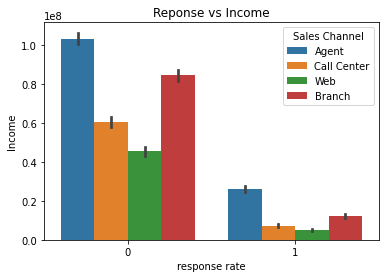

In [19]:
#Show a plot of the response rate by income
#y_positions = range(len(data['response rate']))

ax = sns.barplot(x="response rate", y="Income", hue="Sales Channel", data=data, estimator=np.sum)


plt.title("Reponse vs Income")
plt.show()




# **Lab | Customer Analysis Round 4**

In [28]:
data.shape

(9134, 25)

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [29]:
data.dtypes #checking the data types of the columns


Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [30]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = np.object)
print("------")
numerical.dtypes
print("------")
print("------")
categorical.dtypes
#data['numerical'] = data._get_numeric_data()  #getting numeric data types, and creating a column
#data['categorical'] =data.select_dtypes('object') #getting categorical data types, and creating a column
#data['numerical'].dtypes

------


Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
response rate                      int64
dtype: object

------
------


Customer            object
State               object
Response            object
Coverage            object
Education           object
EmploymentStatus    object
Gender              object
Location Code       object
Marital Status      object
Policy Type         object
Policy              object
Renew Offer Type    object
Sales Channel       object
Vehicle Class       object
Vehicle Size        object
dtype: object

In [31]:
#data.select_dtypes('object')
numerical.shape

(9134, 9)

In [32]:
categorical.shape

(9134, 15)

2. Now we will try to check the normality of the numerical variables visually

  1. Use seaborn library to construct distribution plots for the numerical variables
  2. Use Matplotlib to construct histograms
  3. Do the distributions for different numerical variables look like a normal distribution

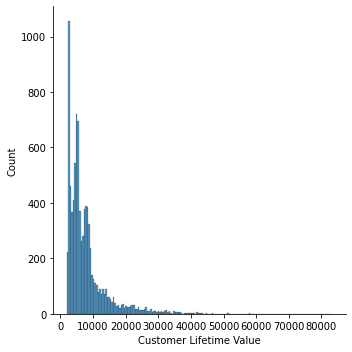

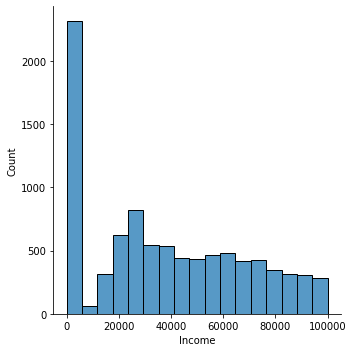

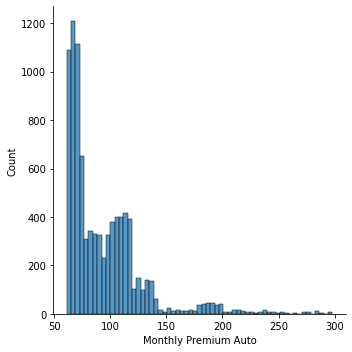

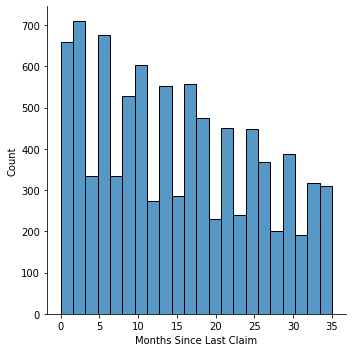

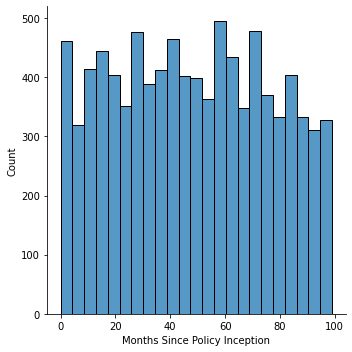

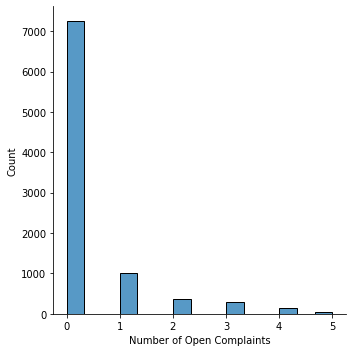

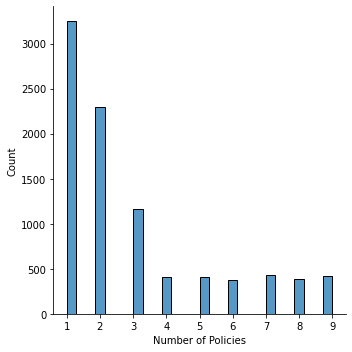

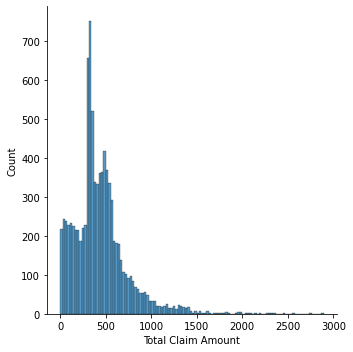

In [33]:
#print distribution plots
%matplotlib inline
for i in range(8):
  sns.displot(numerical.iloc[:,i])
  plt.show()
#sns.(numerical.iloc[:i])
#plt.show()
#plt.show()


(array([4.726e+03, 2.534e+03, 7.960e+02, 3.970e+02, 2.400e+02, 1.730e+02,
        8.800e+01, 6.600e+01, 4.700e+01, 2.800e+01, 1.300e+01, 7.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1898.007675  ,  5969.37635075, 10040.7450265 , 14112.11370225,
        18183.482378  , 22254.85105375, 26326.2197295 , 30397.58840525,
        34468.957081  , 38540.32575675, 42611.6944325 , 46683.06310825,
        50754.431784  , 54825.80045975, 58897.1691355 , 62968.53781125,
        67039.906487  , 71111.27516275, 75182.6438385 , 79254.01251425,
        83325.38119   ]),
 <a list of 20 Patch objects>)

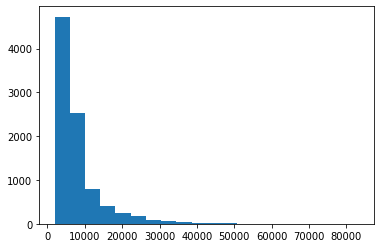

(array([2317.,    0.,  247.,  275.,  690.,  691.,  441.,  452.,  422.,
         327.,  381.,  410.,  410.,  349.,  375.,  323.,  271.,  274.,
         238.,  241.]),
 array([    0.  ,  4999.05,  9998.1 , 14997.15, 19996.2 , 24995.25,
        29994.3 , 34993.35, 39992.4 , 44991.45, 49990.5 , 54989.55,
        59988.6 , 64987.65, 69986.7 , 74985.75, 79984.8 , 84983.85,
        89982.9 , 94981.95, 99981.  ]),
 <a list of 20 Patch objects>)

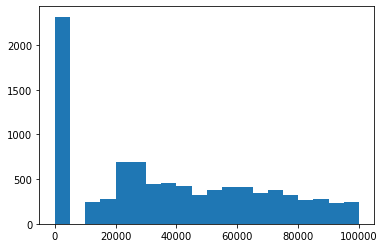

(array([3413., 1302.,  983., 1091., 1127.,  426.,  262.,   48.,   41.,
          39.,  141.,  106.,   38.,   24.,   16.,   29.,   10.,   11.,
          19.,    8.]),
 array([ 61.  ,  72.85,  84.7 ,  96.55, 108.4 , 120.25, 132.1 , 143.95,
        155.8 , 167.65, 179.5 , 191.35, 203.2 , 215.05, 226.9 , 238.75,
        250.6 , 262.45, 274.3 , 286.15, 298.  ]),
 <a list of 20 Patch objects>)

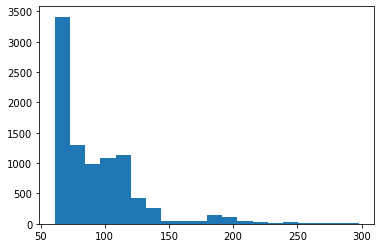

(array([659., 710., 648., 364., 612., 556., 570., 285., 554., 558., 475.,
        231., 451., 450., 422., 182., 407., 372., 317., 311.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  ]),
 <a list of 20 Patch objects>)

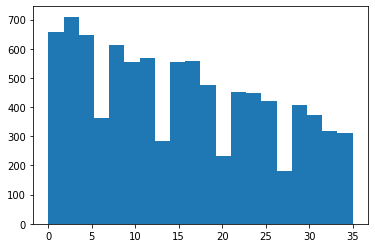

(array([462., 416., 482., 476., 471., 467., 487., 497., 494., 466., 495.,
        505., 513., 435., 482., 462., 380., 421., 395., 328.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 20 Patch objects>)

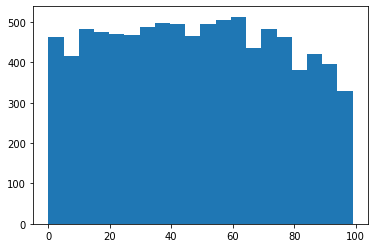

(array([7252.,    0.,    0.,    0., 1011.,    0.,    0.,    0.,  374.,
           0.,    0.,    0.,  292.,    0.,    0.,    0.,  149.,    0.,
           0.,   56.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 20 Patch objects>)

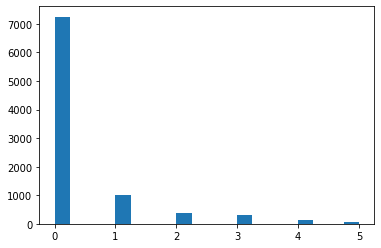

(array([3251.,    0., 2294.,    0.,    0., 1168.,    0.,  409.,    0.,
           0.,  407.,    0.,  372.,    0.,    0.,  433.,    0.,  384.,
           0.,  416.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <a list of 20 Patch objects>)

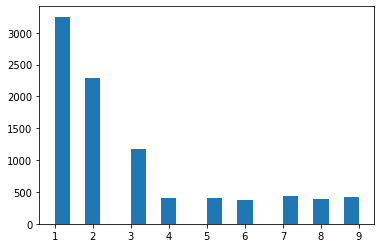

(array([1.279e+03, 1.171e+03, 2.764e+03, 1.971e+03, 8.450e+02, 4.570e+02,
        2.650e+02, 1.210e+02, 1.010e+02, 8.200e+01, 2.500e+01, 1.100e+01,
        1.200e+01, 1.100e+01, 8.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([9.90070000e-02, 1.44756041e+02, 2.89413074e+02, 4.34070108e+02,
        5.78727141e+02, 7.23384175e+02, 8.68041208e+02, 1.01269824e+03,
        1.15735528e+03, 1.30201231e+03, 1.44666934e+03, 1.59132638e+03,
        1.73598341e+03, 1.88064044e+03, 2.02529748e+03, 2.16995451e+03,
        2.31461154e+03, 2.45926858e+03, 2.60392561e+03, 2.74858264e+03,
        2.89323968e+03]),
 <a list of 20 Patch objects>)

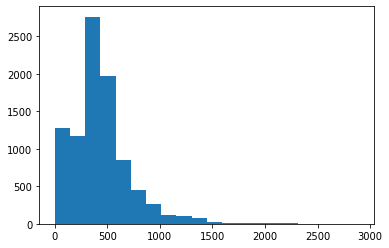

In [34]:
#using matplotlib to create histograms:
%matplotlib inline
#plt.hist(numerical['Monthly Premium Auto'],bins=3)
#plt.show

for i in range(8):
  plt.hist(numerical.iloc[:,i],bins=20)
  #plt.hist(numerical[i],bins=3)
  plt.show()

None of them are normal distributions. But there are a couple in there that could be transformed into normal distributions by using some of the methods we know.

3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [36]:
#target variable is total_claim_amount so it is a label, so we should drop it.

numerical1 = numerical.drop(['Total Claim Amount'], axis=1)
numerical1.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'response rate'],
      dtype='object')

In [37]:
correlations_matrix = numerical1.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,response rate
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.008930
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.011932
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.010966
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.016597
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.002952
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.009881
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.020891
response rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,1.000000


In [38]:
#checking multicollinearty with VIF
import pandas.util.testing as tm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#creating VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = numerical1.columns

#calculating VIF for each feature

vif_data['VIF'] = [variance_inflation_factor(numerical1.values,i) for i in range(len(numerical1.columns))]

print(vif_data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


                         feature       VIF
0        Customer Lifetime Value  2.806327
1                         Income  2.283693
2           Monthly Premium Auto  6.419968
3        Months Since Last Claim  2.784240
4  Months Since Policy Inception  3.273470
5      Number of Open Complaints  1.166610
6             Number of Policies  2.297367
7                  response rate  1.156951


A greater VIF means greater correlation. This is because it is inversely proportional to 1-R^2. VIF above 5 indicates a high multicollinearity. From the VIF calcualted above, only "Monthly Premium auto" has value over 5 (its about 6.419968). This suggests that Monthly Premium Auto might be highly multicollinear.

Collinearity is a linear association between two predictors. Multicollinearity is a situation where two or more predictors are highly linearly related. In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity.


Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [ ]:
#creating heatmap
plt.figure(figsize = (12,5))
sns.heatmap(correlations_matrix,annot =True, linewidths =.10, data=numerical1)
plt.show()

Do not see any values that are greater than 0.9. So deciding not to drop anything.

#**Lab | Customer Analysis Round 5**

**Processing Data**
(Further processing...)


**1. X-y split.**

In [39]:
y=numerical['Total Claim Amount']
X=numerical1

X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,response rate
0,2763.519279,56274,69,32,5,0,1,0
1,6979.535903,0,94,13,42,0,8,0
2,12887.431650,48767,108,18,38,0,2,0
3,7645.861827,0,106,18,65,0,7,0
4,2813.692575,43836,73,12,44,0,1,0
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,0
9130,3096.511217,21604,79,14,28,0,1,1
9131,8163.890428,0,85,9,37,3,2,0
9132,7524.442436,21941,96,34,3,0,3,0


In [40]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(X,y)
print(model.intercept_)
print(model.coef_)

70.71603853302719
[-6.65481056e-04 -3.29501595e-03  5.34054349e+00 -1.39376492e-01
 -1.02582281e-01 -1.32651363e+00  2.82383879e-01  1.15007734e+01]


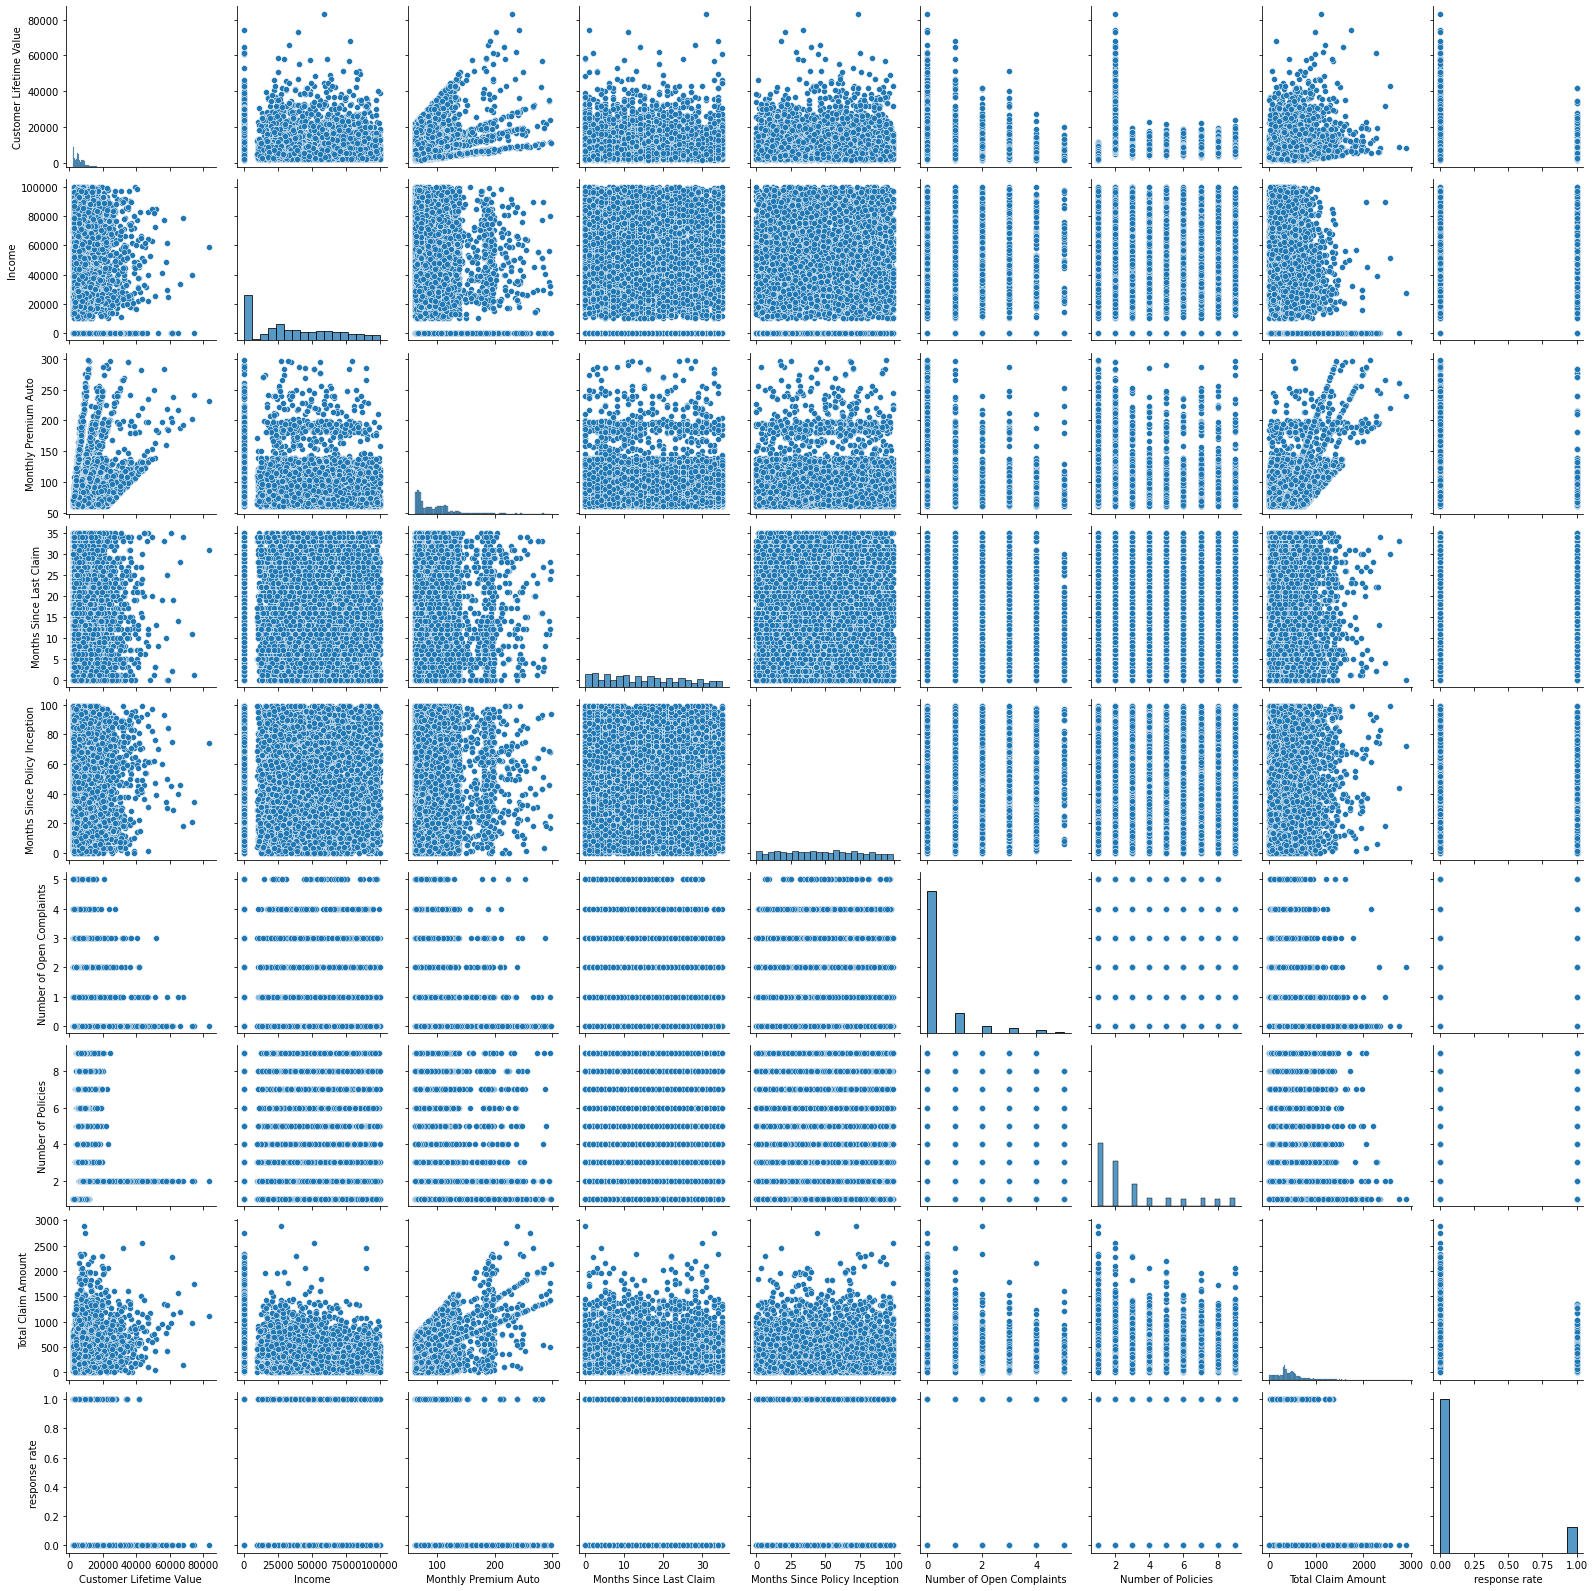

In [41]:
sns.pairplot(numerical)
plt.show()

In [42]:
numerical.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,response rate
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


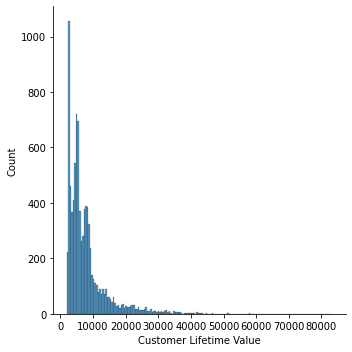

In [43]:
sns.displot(numerical['Customer Lifetime Value'])
plt.show()

2. Normalize (numerical).

In [44]:
#importing libraries needed

from sklearn.preprocessing import MinMaxScaler #map min value to 0 and max value to 1
from sklearn.preprocessing import StandardScaler #for each value it will subtract the mean value, shifts the axis, and the ..

In [159]:
#using MinMaxScaler to scale it between values 0 and 1
transformer = MinMaxScaler().fit(numerical)
x_normalized = transformer.transform(numerical)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=numerical.columns) 
x_normalized.head()

(9134, 9)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,response rate
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0


In [160]:
transformer = StandardScaler().fit(numerical)
x_standardized = transformer.transform(numerical)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=numerical.columns)
x_standardized.head()
#output will standardize values 

(9134, 9)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,response rate
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,-0.408822
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,-0.408822
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,-0.408822
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,-0.408822
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,-0.408822


# **Lab| Customer Analysis Round 6**

**Processing Data**

1. **One Hot or Label Encoding**

In [48]:
categorical.head()
X_cat = categorical

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [119]:
#Using OneHotEncoder to get categorical variables into multiple numerical columns
X_cat1=X_cat.drop(['Customer','State','Response','EmploymentStatus','Education','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size'],axis=1)
#import OneHotEncoder, assign encoder to fit of X_cat
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat1)
#Printing categories to see how the values of these variables look like
print(encoder.categories_)


[array(['Basic', 'Extended', 'Premium'], dtype=object)]


In [121]:
#some of the above results look quite different. Counting unique values for these:
#X_cat1=X_cat.drop(['Customer','State','Response','Coverage','Education','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size'],axis=1)

X_cat1.head()

,Coverage
0,Basic
1,Extended
2,Premium
3,Basic
4,Basic


In [122]:
#assign variable encoded to transform and convert to array
encoded = encoder.transform(X_cat1).toarray()
print(encoded)
#create a dataframe with columns with 
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded.head()

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


,Basic,Extended,Premium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [149]:
#Using OneHotEncoder to get categorical variables into multiple numerical columns
X_cat2=X_cat.drop(['Customer','State','Response','Coverage','Education','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size'],axis=1)
#import OneHotEncoder, assign encoder to fit of X_cat
from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder().fit(X_cat2)
#Printing categories to see how the values of these variables look like
print(encoder2.categories_)

[array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object)]


In [267]:
encoded1 = encoder2.transform(X_cat2).toarray()
print(encoded1)
#create a dataframe with columns with 
onehot_encoded1 = pd.DataFrame(encoded1,columns=encoder2.categories_)
onehot_encoded1.head()

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


,Disabled,Employed,Medical Leave,Retired,Unemployed
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


2. **Concat DataFrames**

In [269]:
#we can drop one axis from each of these so our dataframes are nice and clean before concatenating
#we can drop it because we can still deduce one of the variables from others

#onehot_encoded = onehot_encoded.drop(['Extended'],axis=1)
onehot_encoded.head()


,Basic,Premium
0,1.0,0.0
1,0.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [167]:
onehot_encoded1 = onehot_encoded1.drop(['Disabled'],axis=1)
onehot_encoded1.head()

,Employed,Medical Leave,Retired,Unemployed
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [282]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([x_normalized, onehot_encoded], axis=1)
#X = X.rename(columns={("Basic,"):"Basic Coverage",("Premium,"):"Premium Coverage"},inplace=True)
#X = X.drop(["Total Claim Amount"],axis=1)

X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,response rate,"(Basic,)","(Premium,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0.0,0.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,1.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,1.0,0.0


In [238]:
#doing the same for second
X1 = pd.concat([x_normalized, onehot_encoded1], axis=1)
X1 = X1.drop(["Total Claim Amount"],axis=1)
X1.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,1.0,0.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,0.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,0.0,0.0,1.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,1.0,0.0,0.0,0.0


In [239]:
X2 = pd.concat([x_normalized,onehot_encoded,onehot_encoded1], axis=1)
X2 = X2.drop(["Total Claim Amount"],axis=1)
X2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,response rate,"(Basic,)","(Premium,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [228]:
#assigning y to target variable
y = X2['Total Claim Amount']
y.head()

0    0.132974
1    0.391051
2    0.195764
3    0.183117
4    0.047710
Name: Total Claim Amount, dtype: float64

In [240]:
#I am going to test for each X, X1 and X2 to see how modeling and predictions change with different features or combinations of them.
#because i am curious
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state=100)
X1_train,X1_test,y_train,y_test = train_test_split(X1,y, test_size =0.2, random_state=100)
X2_train,X2_test,y_train,y_test = train_test_split(X2,y, test_size =0.2, random_state=100)

In [241]:
#printing shape for each of these three

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("          ")
print("----------")
print("          ")
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)
print("          ")
print("----------")
print("          ")
print(X2_train.shape)
print(X2_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 10)
(1827, 10)
(7307,)
(1827,)
          
----------
          
(7307, 12)
(1827, 12)
(7307,)
(1827,)
          
----------
          
(7307, 14)
(1827, 14)
(7307,)
(1827,)


In [242]:
#checking for X
X_train.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,response rate,"(Basic,)","(Premium,)"
7706,0.016790,0.258249,0.088608,0.285714,0.696970,0.0,0.000,1.0,0.0,0.0
779,0.115687,0.792851,0.143460,0.800000,0.616162,0.6,0.125,0.0,0.0,0.0


In [243]:
y_train.head(2)

7706    0.136012
779     0.157580
Name: Total Claim Amount, dtype: float64

In [244]:
X_test.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,response rate,"(Basic,)","(Premium,)"
7175,0.039478,0.565978,0.016878,0.114286,0.888889,0.2,0.625,0.0,1.0,0.0
7255,0.036650,0.212400,0.261603,0.085714,0.121212,0.0,0.000,0.0,0.0,0.0


In [246]:
y_test.head(2)

7175    0.107807
7255    0.045336
Name: Total Claim Amount, dtype: float64

On all outputs indexes are same, so it looks like it has worked for X, assuming the same happened for X1 and X2 as the codes are same.

**Linear Regression**

In [247]:
#training/fitting models

model = linear_model.LinearRegression()
model = model.fit(X_train,y_train)

modelA = linear_model.LinearRegression()
modelA = modelA.fit(X1_train,y_train)

modelB = linear_model.LinearRegression()
modelB = modelB.fit(X2_train,y_train)


In [248]:
#Models have been fitted

**Model Validation**

In [249]:
#Now checking if the model is validated. 

#checking test portion of dataset scores and comparing:

model.predict(X_test)

array([0.07694894, 0.22456877, 0.1092797 , ..., 0.04563013, 0.24157906,
       0.11553822])

In [250]:
modelA.predict(X1_test)

array([0.07008305, 0.2023988 , 0.08960046, ..., 0.05866192, 0.25241777,
       0.09447594])

In [251]:
modelB.predict(X2_test)

array([0.07112164, 0.19937935, 0.09069871, ..., 0.05948228, 0.25371949,
       0.09563626])

In [252]:
#checking the prediction score for each of these models
from sklearn.metrics import r2_score

prediction1 = model.predict(X_test)
r2_score(y_test,prediction1)


0.474861797636567

In [253]:
prediction2 = modelA.predict(X1_test)
r2_score(y_test,prediction2)

0.48774447556591105

In [254]:
prediction3 = modelB.predict(X2_test)
r2_score(y_test,prediction3)

0.48905447696851256

# **Lab| Customer Analysis Round 7**

**Improving the linear regression model**

In [285]:
X_cat.head(2)

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [293]:
encoder_all = OneHotEncoder().fit(X_cat)
#Printing categories to see how the values of these variables look like
print(encoder_all.categories_)

[array(['AA10041', 'AA11235', 'AA16582', ..., 'ZZ89380', 'ZZ91716',
       'ZZ97035'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-

In [297]:
encoded_all = encoder_all.transform(X_cat).toarray()
print(encoded_all)
#onehot_encoded_all={X_cat:[]}
#create a dataframe with columns with all categorical variables
onehot_encoded_all = pd.DataFrame({encoded_all},columns=encoder_all.categories_)
onehot_encoded_all.head()

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


TypeError: ignored

# **Lab | Customer Analysis Final Round**

**Present Results**